In [35]:
# Import packages
import panel as pn
import pandas as pd
import numpy as np
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
from pathlib import Path

In [2]:
# Load .env environment variable and read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

#Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

In [3]:
#Get data for function
f1_circuits_path = Path ('f1_circuits.csv')
df=pd.read_csv(f1_circuits_path)
df.loc[78,'Name']=['Albert Park Circuit']
circuit_info=pd.read_html('https://en.wikipedia.org/wiki/List_of_Formula_One_circuits')
circuits = circuit_info[2].rename(columns={'Location':'Loc'})
circuits1 = circuits.iloc[:,4].str.split(',', expand=True)
circuits1 = circuits1.rename(columns={0:'City',1:'Ctry'})
circuits_r=pd.concat([circuits,circuits1], axis='columns', join='inner').copy()
circuits_r
cir_r=circuits_r.replace({'Aintree':'Liverpool', 
                          'Scarperia e San Piero':'Mugello',
                          'West Kingsdown':'Kent', 
                          'Greater Noida': 'Uttar Pradesh', 
                          'Saint-Genès-Champanelle':'Clermont-Ferrand', 
                          'Monte Carlo': 'Monte-Carlo', 
                          'Magny-Cours':'Magny Cours',
                          'Gueux':'Reims',
                          'Prenois':'Dijon',
                          'Mont-Tremblant':'Quebec',
                          'Porto':'Oporto',
                          'San Sebastián de los Reyes':'Jarama',
                          'Nivelles':'Brussels', 
                          'Mogyoród':'Budapest', 
                          'Speedway':'Indianapolis', 
                          'Las Vegas':'Nevada',
                          'Long Beach':'California', 
                          'Lusail': 'Al Daayen', 
                          'Miami Gardens':'Miami', 
                          'Bowmanville':'Ontario',
                          'East London':'Eastern Cape Province',
                          'Spielberg':'Spielburg', 
                          'Moreno Valley':'California', 
                          'Orival':'Rouen',
                          'Sebring':'Florida', 
                          'Sepang':'Kuala Lumpur',
                          'Jiading':'Shanghai', 
                          'Sirius':'Sochi',
                          'Watkins Glen': 'New York State', 
                          'Zeltweg':'Styria'
                         })
master_circuits=pd.merge(left=df, right=cir_r, how='left', left_on='Location', right_on='City')
master_circuits

,Name,Location,Country,Latitude,Longitude,Altitude (m),N. races,Wikipedia,Circuit,Map,Type,Direction,Loc,Last length used,Grands Prix,Season(s),Grands Prix held,City,Ctry
0,Scandinavian Raceway,Anderstorp,Sweden,57.2653,13.60420,153,6,Link,Scandinavian Raceway,NaN,Race circuit,Clockwise,"Anderstorp, Sweden",4.031 km (2.505 mi),Swedish Grand Prix,1973–1978,6.0,Anderstorp,Sweden
1,Aintree,Liverpool,UK,53.4769,-2.94056,20,5,Link,Aintree Motor Racing Circuit,NaN,Road circuit,Clockwise,"Aintree, United Kingdom",4.828 km (3.000 mi),British Grand Prix,"1955, 1957, 1959, 1961–1962",5.0,Liverpool,United Kingdom
2,Donington Park,Castle Donington,UK,52.8306,-1.37528,88,1,Link,Donington Park,NaN,Race circuit,Clockwise,"Castle Donington, United Kingdom",4.020 km (2.498 mi),European Grand Prix,1993,1.0,Castle Donington,United Kingdom
3,AVUS,Berlin,Germany,52.4806,13.25140,53,1,Link,AVUS,NaN,Road circuit,Anti-clockwise,"Berlin, Germany",8.300 km (5.157 mi),German Grand Prix,1959,1.0,Berlin,Germany
4,Circuit Park Zandvoort,Zandvoort,Netherlands,52.3888,4.54092,0,32,Link,Circuit Zandvoort ✔,NaN,Race circuit,Clockwise,"Zandvoort, Netherlands",4.259 km (2.646 mi),Dutch Grand Prix,"1952–1953, 1955, 1958–1971, 1973–1985, 2021",31.0,Zandvoort,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Kyalami,Midrand,South Africa,-25.9894,28.07670,1460,20,Link,Kyalami Grand Prix Circuit,NaN,Race circuit,Anti-clockwise,"Midrand, South Africa",4.261 km (2.648 mi),South African Grand Prix,"1967–1980, 1982–1985, 1992–1993",20.0,Midrand,South Africa
80,Prince George Circuit,Eastern Cape Province,South Africa,-33.0486,27.87360,15,3,Link,Prince George Circuit,NaN,Race circuit,Clockwise,"East London, South Africa",3.920 km (2.436 mi),South African Grand Prix,"1962–1963, 1965",3.0,Eastern Cape Province,South Africa
81,Autódromo Juan y Oscar Gálvez,Buenos Aires,Argentina,-34.6943,-58.45930,8,20,Link,Autódromo Juan y Oscar Gálvez,NaN,Race circuit,Clockwise,"Buenos Aires, Argentina",4.259 km (2.646 mi),Argentine Grand Prix,"1953–1958, 1960, 1972–1975, 1977–1981, 1995–1998",20.0,Buenos Aires,Argentina
82,Adelaide Street Circuit,Adelaide,Australia,-34.9272,138.61700,58,11,Link,Adelaide Street Circuit,NaN,Street circuit,Clockwise,"Adelaide, Australia",3.780 km (2.349 mi),Australian Grand Prix,1985–1995,11.0,Adelaide,Australia


In [11]:
# Create function
def world_circuit_map():
    '''World Map of F1 Circuits'''
    plot =  px.scatter_mapbox(
    data_frame= master_circuits,
    lat = 'Latitude',
    lon = 'Longitude',
    color = 'Name',
    mapbox_style = 'open-street-map',
    zoom = 1,
    size_max = 20,
    height = 800,
    width = 1450,
    hover_data = ['Last length used','Season(s)','N. races', 'Direction', 'Type'],
    title = 'F1 Circuit Locations Around the World'
        )
    return plot

In [16]:
# Create dashboard with World Map of F1 Circuits
map_dash = pn.Column(
    pn.pane.Markdown('#F1 Circuit Locations Around the World\r\n Total: 84 Circuits as of today', 
                     style={'color':'yellow', 'font-family':'serif'}),
    world_circuit_map
    )


In [17]:
#Execute dashboard
map_dash.servable()

Column
    [0] Markdown(str, style={'color': 'yellow', ...})
    [1] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive02151')

In [21]:
#Obtain data to create function
f1_stats=pd.read_html('https://en.everybodywiki.com/List_of_Formula_One_podium_finishers')
podium=f1_stats[3]
by_country=podium.loc[:,['Country','Podiums']].groupby('Country').sum().reset_index().sort_values('Podiums',ascending=True)
by_driver=podium.loc[:,['Driver','Podiums']].groupby('Driver').sum().reset_index().sort_values('Podiums',ascending=True)

In [47]:
# Create function
def podium_finishes_country():
    plot_by_country =px.bar(
        by_country,
        title='Number of F1 Podium Finishes by Country (1950 - 2018)',
        y='Podiums',
        #x='Country', 
        #figsize=(10,10), 
        #legend=False, 
        color='Country') 
        #grid=True)
    return plot_by_country

def podium_finishes_driver():
    plot_by_driver = by_driver.plot.barh(
        title='Number of F1 Podium Finishes by Driver (1950 - 2018)',
        y='Podiums',
        x='Driver', 
        figsize=(12,10), 
        legend=False, 
        color='red', 
        grid=True)
    return plot_by_driver 
    

In [93]:
# Create function
def podium_country():
        podium_finishes_country = px.bar(
        by_country.sort_values(by = 'Podiums',ascending=False).nlargest(10,'Podiums'),
        title='Top 10 F1 Podium Finishes by Country (1950 - 2018)',
        x='Podiums',
        orientation='h',
        y='Country',
        height = 500,
        color='Country').update_layout(showlegend=False)
        return podium_finishes_country

def podium_driver():
        podium_finishes_driver = px.bar(
        by_driver.sort_values(by = 'Podiums',ascending=False).nlargest(20,'Podiums'),
        title='Top 20 F1 Podium Finishes by Driver (1950 - 2018)',
        x='Podiums',
        orientation='h',
        y='Driver',
        height = 500,
        color='Driver').update_layout(showlegend=False)
        return podium_finishes_driver    

In [94]:
# Create dashboard for podium finishes
podium_dash = pn.Column(
    pn.pane.Markdown('#Top F1 Podium Finishes by Country and Driver (1950 - 2018)', 
                     style={'color':'yellow', 'font-family':'serif'}),
    podium_country,
    podium_driver
  )

In [95]:
#Execute dashboard
podium_dash.servable()

Column
    [0] Markdown(str, style={'color': 'yellow', ...})
    [1] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive02338')
    [2] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive02344')

In [83]:
#Get data for function
# Read from URL
df_2017 = pd.read_html('https://en.wikipedia.org/wiki/2017_Formula_One_World_Championship')
df_2018 = pd.read_html('https://en.wikipedia.org/wiki/2018_Formula_One_World_Championship')
df_2019 = pd.read_html('https://en.wikipedia.org/wiki/2019_Formula_One_World_Championship')
df_2020 = pd.read_html('https://en.wikipedia.org/wiki/2020_Formula_One_World_Championship')
df_2021 = pd.read_html('https://en.wikipedia.org/wiki/2021_Formula_One_World_Championship')
# Create 5 years of event schedule in dataframes, drop extraneous rows and set index
event_schedule_2017 = df_2017[1].drop(index=20).set_index('Round')
event_schedule_2017 = event_schedule_2017.assign(Year = '2017')

event_schedule_2018 = df_2018[1].drop(index=21).set_index('Round')
event_schedule_2018 = event_schedule_2018.assign(Year = '2018')

event_schedule_2019 = df_2019[1].drop(index=21).set_index('Round')
event_schedule_2019 = event_schedule_2019.assign(Year = '2019')

event_schedule_2020 = df_2020[1].drop(index=17).set_index('Round')
event_schedule_2020 = event_schedule_2020.assign(Year = '2020')

event_schedule_2021 = df_2021[1].drop(index=22).set_index('Round')
event_schedule_2021 = event_schedule_2021.assign(Year = '2021')
# Create 5 years of event results in dataframes, drop extraneous rows and set index
event_result_2017 = df_2017[3].drop(index=20, axis=1).iloc[:,:-1].set_index('Round')

event_result_2018 = df_2018[2].drop(index=21, axis=1).iloc[:,:-1].set_index('Round')

event_result_2019 = df_2019[3].drop(index=21, axis=1).iloc[:,:-1].set_index('Round')

event_result_2020 = df_2020[3].drop(index=17, axis=1).iloc[:,:-1].set_index('Round')

event_result_2021 = df_2021[3].drop(index=22, axis=1).iloc[:,:-1].set_index('Round')

# Rename header
event_result_2021 = event_result_2021.rename(columns={'Pole position[q]':'Pole position'})
#Concatenate event schedule and result dataframes, drop column not needed

event_table_2017 = pd.concat([event_schedule_2017, event_result_2017],axis='columns', join='inner')
event_table_2017 = event_table_2017.drop(event_table_2017.columns[0], axis=1)

event_table_2018 = pd.concat([event_schedule_2018, event_result_2018],axis='columns', join='inner')
event_table_2018 = event_table_2018.drop(event_table_2018.columns[0], axis=1)

event_table_2019 = pd.concat([event_schedule_2019, event_result_2019],axis='columns', join='inner')
event_table_2019 = event_table_2019.drop(event_table_2019.columns[0], axis=1)

event_table_2020 = pd.concat([event_schedule_2020, event_result_2020],axis='columns', join='inner')
event_table_2020 = event_table_2020.drop(event_table_2020.columns[0], axis=1)

event_table_2021 = pd.concat([event_schedule_2021, event_result_2021],axis='columns', join='inner')
event_table_2021 = event_table_2021.drop(event_table_2021.columns[0], axis=1)
# Split header 'Circuit' into 2 separate columns of Circuit Name and City, rename column headers
circuit_expanded_2017= event_table_2017['Circuit'].str.split(',', expand=True)
circuit_expanded_2017=circuit_expanded_2017.iloc[:,:-1]
circuit_expanded_2017=circuit_expanded_2017.rename(columns={0:'Circuit Name',1:'City'})

circuit_expanded_2018= event_table_2018['Circuit'].str.split(',', expand=True)
circuit_expanded_2018=circuit_expanded_2018.iloc[:,:-1]
circuit_expanded_2018=circuit_expanded_2018.rename(columns={0:'Circuit Name',1:'City'})

circuit_expanded_2019= event_table_2019['Circuit'].str.split(',', expand=True)
circuit_expanded_2019=circuit_expanded_2019.iloc[:,:-1]
circuit_expanded_2019=circuit_expanded_2019.rename(columns={0:'Circuit Name',1:'City'})

circuit_expanded_2020t= event_table_2020['Circuit'].str.split(',', expand=True)
circuit_expanded_2020=circuit_expanded_2020t.rename(columns={0:'Circuit Name',1:'City'})

circuit_expanded_2021= event_table_2021['Circuit'].str.split(',', expand=True)
circuit_expanded_2021=circuit_expanded_2021.iloc[:,:-1]
circuit_expanded_2021=circuit_expanded_2021.rename(columns={0:'Circuit Name',1:'City'})
# Concatenate dataframes - Event table and Circuit
event_table_2017r=pd.concat([event_table_2017, circuit_expanded_2017], axis='columns', join='inner')

event_table_2018r=pd.concat([event_table_2018, circuit_expanded_2018], axis='columns', join='inner')

event_table_2019r=pd.concat([event_table_2019, circuit_expanded_2019], axis='columns', join='inner')

event_table_2020r=pd.concat([event_table_2020, circuit_expanded_2020], axis='columns', join='inner')

event_table_2021r=pd.concat([event_table_2021, circuit_expanded_2021], axis='columns', join='inner')
#Create master dataframe for plot by merging event df and circuit df
master_table_2017 = pd.merge(left=event_table_2017r, right=df, how='left', left_on='Circuit Name', right_on='Name')
master_table_2018 = pd.merge(left=event_table_2018r, right=df, how='left', left_on='Circuit Name', right_on='Name')
master_table_2019 = pd.merge(left=event_table_2019r, right=df, how='left', left_on='Circuit Name', right_on='Name')
master_table_2020 = pd.merge(left=event_table_2020r, right=df, how='left', left_on='Circuit Name', right_on='Name')
master_table_2021 = pd.merge(left=event_table_2021r, right=df, how='left', left_on='Circuit Name', right_on='Name')
#Create master dataframe for plot by merging event df and circuit df
master_table_2017 = pd.merge(left=event_table_2017r, right=df, how='left', left_on='Circuit Name', right_on='Name')

master_table_2018 = pd.merge(left=event_table_2018r, right=df, how='left', left_on='Circuit Name', right_on='Name')

master_table_2019 = pd.merge(left=event_table_2019r, right=df, how='left', left_on='Circuit Name', right_on='Name')

master_table_2020 = pd.merge(left=event_table_2020r, right=df, how='left', left_on='Circuit Name', right_on='Name')

master_table_2021 = pd.merge(left=event_table_2021r, right=df, how='left', left_on='Circuit Name', right_on='Name')
#Append master dataframe for each year into a main master dataframe containing all 5 years of data
master_table = master_table_2017.append(master_table_2018, ignore_index=False)
master_table = master_table.append(master_table_2019, ignore_index=False)
master_table = master_table.append(master_table_2020, ignore_index=False)
master_table = master_table.append(master_table_2021, ignore_index=False)

In [114]:
# Define functions
def constructor():
    plot_constructor = px.sunburst(
    master_table, path=['Year','City','Winning constructor'], 
    width=1000, 
    height=800, 
    color='Winning constructor', 
    hover_data=['Fastest lap','Pole position','Winning driver'],
    title='Winning Constructors by Year')
    return plot_constructor.show()

def driver():
    plot_driver = px.sunburst(
    master_table, 
    path=['Year','City','Fastest lap','Pole position','Winning driver'],
    width=1000, 
    height=800, 
    color='Winning driver', 
    hover_data=['Winning constructor'],
    color_discrete_map={'Lewis Hamilton':'black', 'Sebastian Vettel':'gold', 'Lewis Hamilton':'darkblue'},
    title='Winning Drivers by Year'
)
    return plot_driver.show()

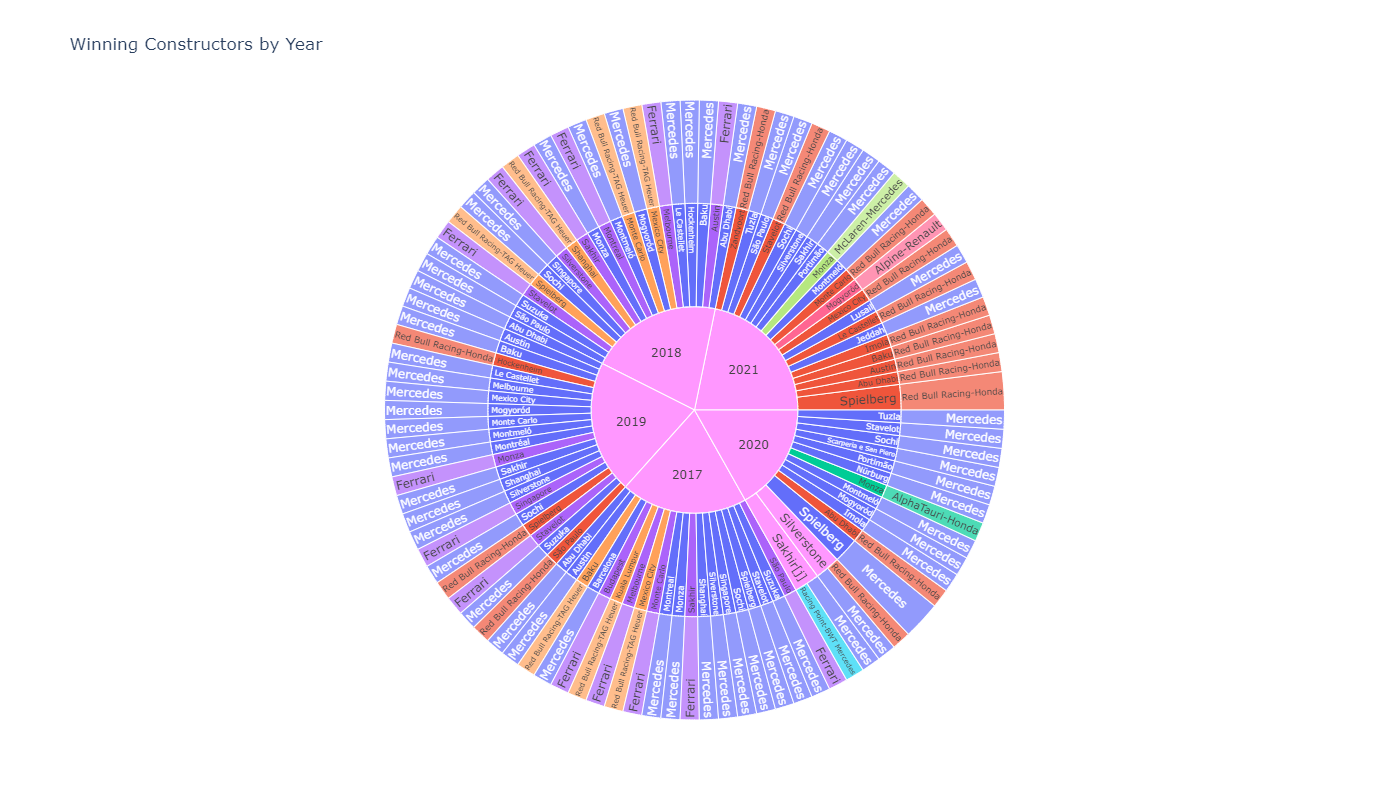

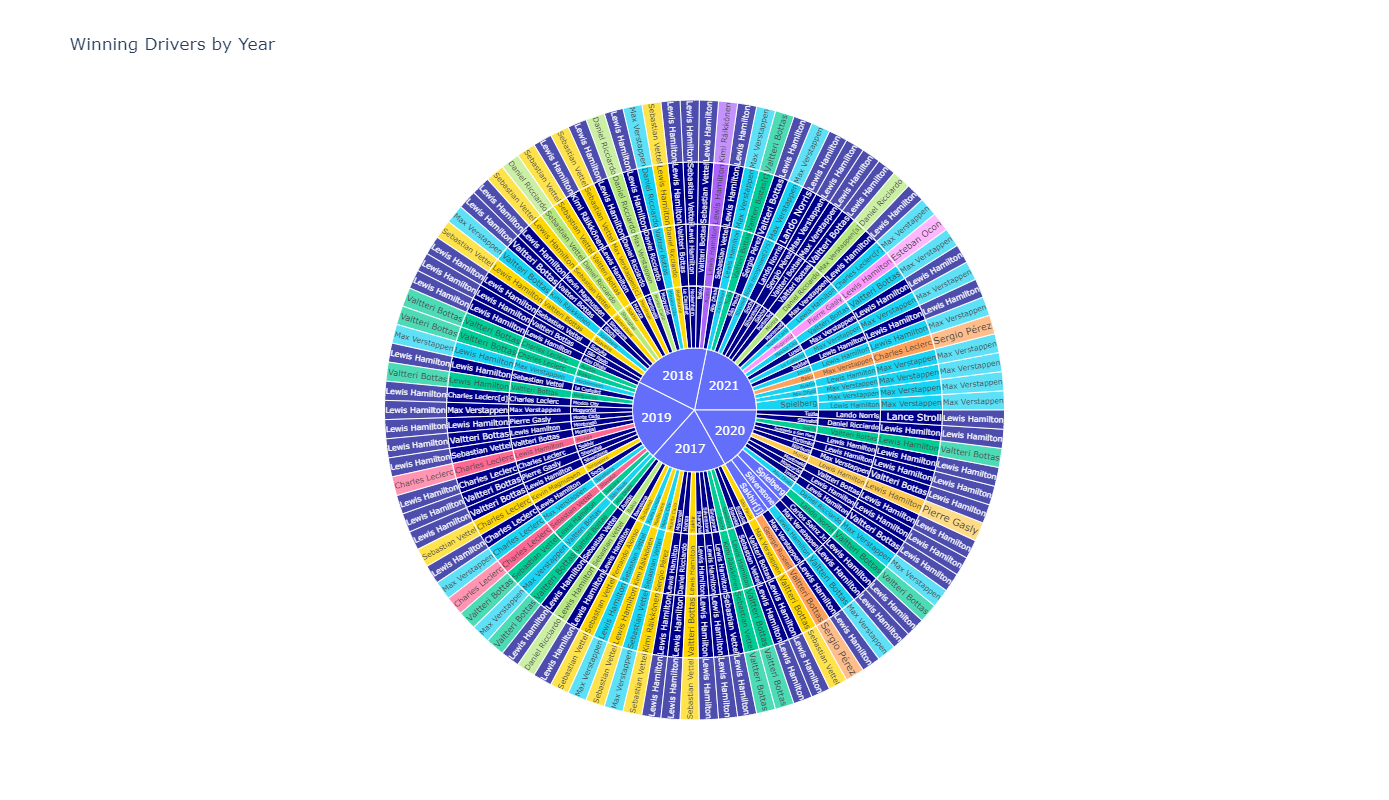

In [123]:
# Create dashboard for Constructor and Driver
constructor_driver_dash = pn.Column(
    pn.pane.Markdown('#Sunburst Charts on Winning Teams', 
                     style={'color':'yellow', 'font-family':'serif'}),
    pn.Row(constructor),
    pn.Row(driver)
  )

In [124]:
#Execute dashboard
constructor_driver_dash.servable()

Column
    [0] Markdown(str, style={'color': 'yellow', ...})
    [1] Row
        [0] Column
            [0] Column()
            [1] Row
                [0] Str(None, name='interactive02541')
    [2] Row
        [0] Column
            [0] Column()
            [1] Row
                [0] Str(None, name='interactive02548')